# Рекомендация тарифов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-задачи-и-данных" data-toc-modified-id="Описание-задачи-и-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание задачи и данных</a></span><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание задачи</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Описание задачи и данных

### Описание задачи

Нужно построить модель для задачи классификации, которая выберет подходящий тариф для пользователя. 

### Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


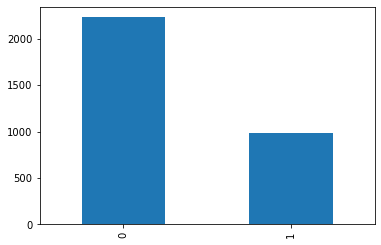

In [5]:
df['is_ultra'].value_counts().plot(kind='bar')

В выборке значительно больше пользователей тарифа `Smart`.

## Разбиение данных на выборки

Ключевой признак - принадлежность к тарифу `Ultra` или `Smart`. Всё остальное - признаки, которые будут определять целевой.

In [6]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Нужно получать обучающую, валидационную и тестовую выборки. Для этого вначале разобьем исходную выборку на обучающую и валидационную в отношении 3:2, затем из валидационной выделим тестовую в отношении 1:1.

In [7]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

(643, 4) (643,)


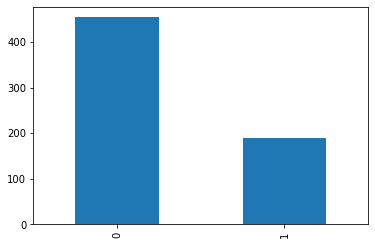

(643, 4) (643,)


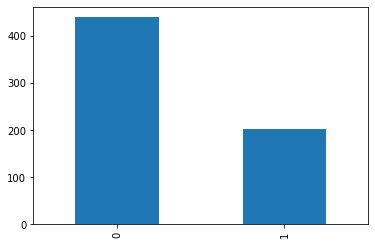

(1928, 4) (1928,)


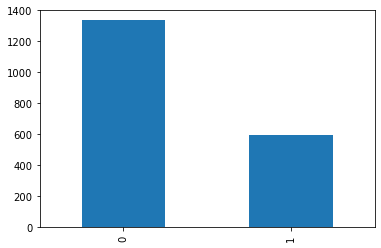

In [8]:
for ar in [[features_test, target_test], [features_valid, target_valid], [features_train, target_train]]:
    print(ar[0].shape, ar[1].shape)
    ar[1].value_counts().plot(kind='bar')
    plt.show()

## Исследование моделей

**Decision Tree Classifier**

In [9]:
best_tree = {
    'best_accuracy': 0,
    'model': None,
    'criterion': 'gini',
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_depth': 0
}
for criterion in ['gini', 'entropy']:
    for samples_split in range(2, 10):
        for samples_leaf in range(1, 10):
            for depth in range(1, 5):
                tree_model = DecisionTreeClassifier(
                    max_depth=depth,
                    random_state=12345,
                    criterion=criterion,
                    min_samples_leaf=samples_leaf,
                    min_samples_split=samples_split)
                tree_model.fit(features_train, target_train)
                accuracy = tree_model.score(features_valid, target_valid)
                if (accuracy > best_tree['best_accuracy']):
                    best_tree['best_accuracy'] = accuracy
                    best_tree['model'] = tree_model
                    best_tree['criterion'] = criterion
                    best_tree['min_samples_split'] = samples_split
                    best_tree['min_samples_leaf'] = samples_leaf
                    best_tree['max_depth'] = depth

print('Accuracy =', best_tree['best_accuracy'])
print(
    'Parameters:\n Criterion = {};\n Max_depth = {};\n Min_samples_split = {}\n Min_samples_leaf = {}'
    .format(best_tree['criterion'], best_tree['max_depth'],
            best_tree['min_samples_split'], best_tree['min_samples_leaf']))

Accuracy = 0.7791601866251944
Parameters:
 Criterion = gini;
 Max_depth = 3;
 Min_samples_split = 2
 Min_samples_leaf = 1


Проверим модель на переобученность.

In [10]:
best_tree['model'].score(features_train, target_train)

0.8075726141078838

Модель не переобучена.

### Random Forest Classifier

In [11]:
best_forest = {
    'best_accuracy': 0,
    'model': None,
    'criterion': 'gini',
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_depth': 0,
    'estimators': 0
}

for subset in itertools.product(['gini', 'entropy'], range(4, 7), range(1, 2),
                                range(3, 8), range(10, 20)):
    criterion, samples_split, samples_leaf, depth, est = subset
    forest_model = RandomForestClassifier(max_depth=depth,
                                          random_state=12345,
                                          criterion=criterion,
                                          min_samples_leaf=samples_leaf,
                                          min_samples_split=samples_split,
                                          n_estimators=est,
                                          n_jobs=-1)
    forest_model.fit(features_train, target_train)
    accuracy = forest_model.score(features_valid, target_valid)
    if (accuracy > best_forest['best_accuracy']):
        best_forest['best_accuracy'] = accuracy
        best_forest['model'] = forest_model
        best_forest['criterion'] = criterion
        best_forest['min_samples_split'] = samples_split
        best_forest['min_samples_leaf'] = samples_leaf
        best_forest['max_depth'] = depth
        best_forest['estimators'] = est

print('Accuracy =', best_forest['best_accuracy'])
print(
    'Parameters:\n Estimators = {};\n Criterion = {};\n Max_depth = {};\n Min_samples_split = {};\n Min_samples_leaf = {}'
    .format(best_forest['estimators'], best_forest['criterion'],
            best_forest['max_depth'], best_forest['min_samples_split'],
            best_forest['min_samples_leaf']))

Accuracy = 0.80248833592535
Parameters:
 Estimators = 14;
 Criterion = gini;
 Max_depth = 7;
 Min_samples_split = 5;
 Min_samples_leaf = 1


In [12]:
best_forest['model'].score(features_train, target_train)

0.8511410788381742

Возможно, модель переобучена.

### Logistic Regression

In [13]:
ac_best = 0
r_s = 0
lr_model = None
for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    log_model = LogisticRegression(solver=solver, max_iter=100000)
    log_model.fit(features_train, target_train)
    accuracy = log_model.score(features_valid, target_valid)
    print('[{}] {}'.format(solver, accuracy))
    if (accuracy > ac_best):
        ac_best = accuracy
        lr_model = log_model
print('\n\nBest accuracy =', ac_best)

[newton-cg] 0.7387247278382582
[lbfgs] 0.6842923794712286
[liblinear] 0.6905132192846034
[sag] 0.6905132192846034
[saga] 0.687402799377916


Best accuracy = 0.7387247278382582


### Вывод

Лучшей моделью оказалась `RandomForestClassifier` с гиперпараметрами:
* Estimators = 14;
* Criterion = gini;
* Max_depth = 7;
* Min_samples_split = 5;
* Min_samples_leaf = 1.

и `accuracy` на валидационной выборке равной ~ 0.802.

## Проверка модели на тестовой выборке

In [14]:
best_forest['model'].score(features_test, target_test)

0.8040435458786936

### Вывод 

`Accuracy` на тестовой выборке оказалось практически идентичной валидационной (разница 0.1%) и равна ~ 0.804.

## Проверка модели на адекватность

Чтобы проверить модели на адекватность, сопоставим каждому целевому признаку из тестовой выборки ноль и посмотрим, в скольки случаях ответы совпадут.

In [15]:
accuracy_score(target_test, np.full(target_test.shape, 0))

0.7060653188180405

## Вывод

Из-за несбалансированности выборки и только двух уникальных значений ключевого признака, можно отвечать нулем в качестве предсказания на выбор тарифа, и в 70 процентах случаев мы окажемся правы. Тем не менее, обученная модель даёт лучшие результаты. Считаю модель адекватной.